### Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import xgboost

In [4]:
train_data = pd.read_csv('Titanic Dataset/train.csv', index_col = 0)
test_data= pd.read_csv('Titanic Dataset/test.csv', index_col = 0)
test_real_outcome = pd.read_csv('Titanic Dataset/gender_submission.csv', index_col = 0)

<AxesSubplot: ylabel='Survived'>

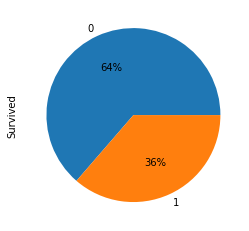

In [5]:
test_real_outcome['Survived'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [6]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# style allows us to change the format that matplotlib uses to plot
style.use('fivethirtyeight')
%matplotlib inline

<AxesSubplot: xlabel='Survived', ylabel='count'>

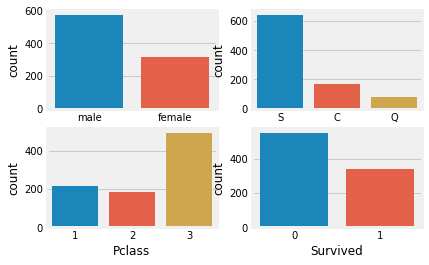

In [9]:
plt.subplot(2, 2, 1)
sns.countplot(x=train_data["Sex"])

plt.subplot(2, 2, 2)
sns.countplot(x=train_data["Embarked"])

plt.subplot(2, 2, 3)
sns.countplot(x=train_data["Pclass"])

plt.subplot(2, 2, 4)
sns.countplot(x=train_data["Survived"])

### Null Records (Training Data)

Null records: 
- Age : 77 null records
- Cabin : 687 null records
- Embarked : 2 null records 

The Age Column should not have any null values. 

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 1. Cabin 

In [12]:
train_data[train_data['Cabin'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


There are a lot of null values in the cabin. The percentage of the null values is more than 70% of the total dataset.
We cannot omit these records since it means that we will be omitting valuable and important data. 

In [13]:
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [14]:
train_cabin = train_data.groupby('Cabin').count()
train_cabin.sort_values('Name', ascending=False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Cabin,,,,,,,,,,
C23 C25 C27,4,4,4,4,4,4,4,4,4,4
G6,4,4,4,4,4,4,4,4,4,4
B96 B98,4,4,4,4,4,4,4,4,4,4
F2,3,3,3,3,3,3,3,3,3,3
C22 C26,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...
C101,1,1,1,1,1,1,1,1,1,1
B94,1,1,1,1,1,1,1,1,1,1
B86,1,1,1,1,1,1,1,1,1,1


As it will be difficult to decide a way to input data into this variables, we will be omitting the use of cabin during the modelling 

#### 2. Embarked 

In [15]:
train_data[train_data['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [16]:
train_data.groupby('Embarked').count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,
C,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,554,644,644,644,644,129


As most record has an Embarked value equal to 'S' and we only have 2 records with null Embarked values, we will use 'S' to replace the NaN value. 

In [17]:
train_data["Embarked"].fillna("S", inplace = True)

In [18]:
train_data[train_data['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [19]:
train_data['Embarked'].info()

<class 'pandas.core.series.Series'>
Int64Index: 891 entries, 1 to 891
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


#### 3. Age 

In [20]:
train_data[train_data['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


The percentage of records with NaN age value is close to 20%. Thus, we cannot delete this data as it will omit the other valuable information. In order to not affect the distribution of the age variable, we will replace the NaN value with the mean of the age which is equal to 29.699118

In [21]:
train_data['Age'].fillna(29.699118, inplace=True)

In [22]:
train_data[train_data['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [23]:
train_data['Age'].info()

<class 'pandas.core.series.Series'>
Int64Index: 891 entries, 1 to 891
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


### Test Data Cleaning

In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


### Null Values

The list of numbers of null values are as follows: 
- Age: 86 null values
- Fare: 1 null values 
- Cabin: 327 null values

#### 1. Cabin 

The percentage of null cabin values is more than 78% of the total dataset. We cannot delete this records since it will affect the model accuracy. Thus, we will proceed to not include this variable in the modelling

In [25]:
1-test_data['Cabin'].count()/test_data['Cabin'].isnull().count()

0.7822966507177034

#### 2. Age

The percentage of null cabin values is slightly more than 20% of the total dataset. We cannot delete this records since it will affect the model accuracy. Thus, we will proceed to replace the NaN values with the mean of the age. 

In [26]:
1-test_data['Age'].count()/test_data['Age'].isnull().count()

0.20574162679425834

In [27]:
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

In [29]:
test_data[test_data['Age'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


#### 3. Fare

Since there is only one NaN values for the fare, we will replace this with the mean of Fare. 

In [30]:
test_data[test_data['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [31]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [32]:
test_data[test_data['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


### Outlier Checking

<AxesSubplot: >

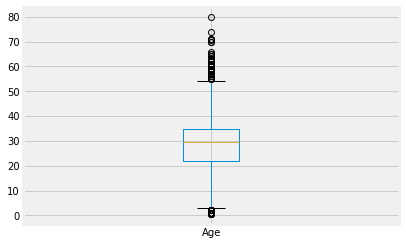

In [33]:
train_data.boxplot(column='Age')

In [34]:
Q1_Age = np.percentile(train_data['Age'], [25])
IQR = np.percentile(train_data['Age'], [75])- np.percentile(train_data['Age'], [25])
Q1_Age - 1.5*IQR

array([2.5])

In [35]:
train_data[train_data['Age']<=2.5]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S
165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S
298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


It does look like there is quite a big variation in age but this could represent natural variance. Thus, we will let it be. 

<AxesSubplot: >

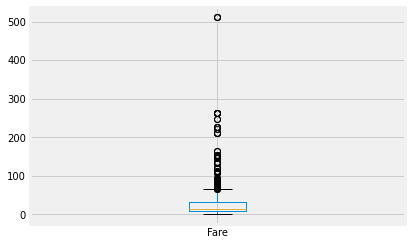

In [36]:
train_data.boxplot(column='Fare')

In [37]:
train_data.groupby(round(train_data['Fare'],0)).count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Fare,,,,,,,,,,,
0.0,15,15,15,15,15,15,15,15,15,3,15
4.0,1,1,1,1,1,1,1,1,1,0,1
5.0,1,1,1,1,1,1,1,1,1,1,1
6.0,5,5,5,5,5,5,5,5,5,0,5
7.0,65,65,65,65,65,65,65,65,65,0,65
...,...,...,...,...,...,...,...,...,...,...,...
228.0,4,4,4,4,4,4,4,4,4,2,4
248.0,2,2,2,2,2,2,2,2,2,2,2
262.0,2,2,2,2,2,2,2,2,2,2,2


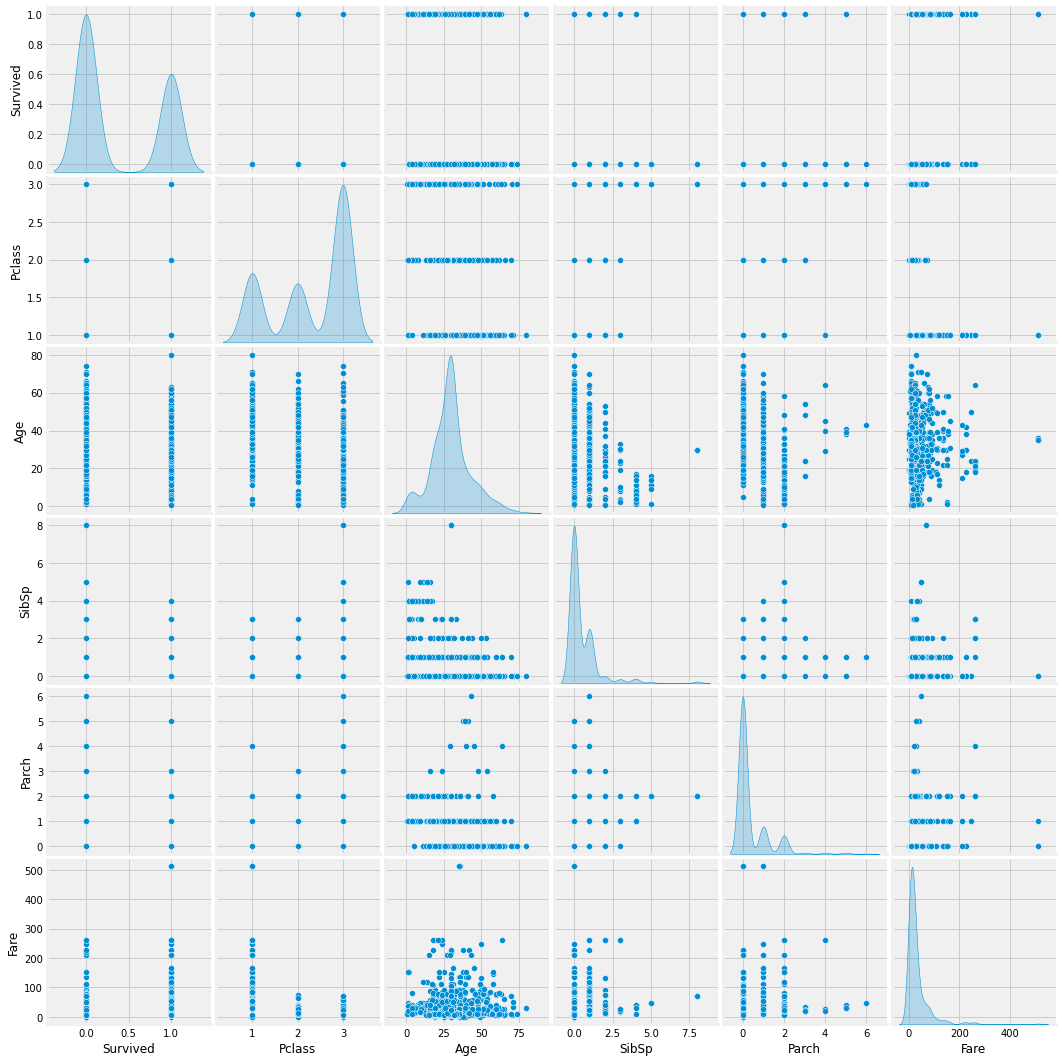

In [38]:
sns.pairplot(train_data, diag_kind='kde')

<AxesSubplot: >

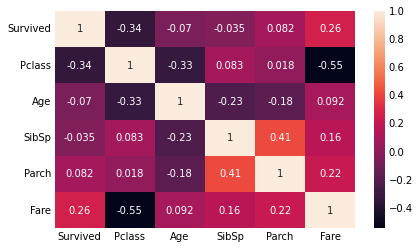

In [39]:
sns.heatmap(train_data.corr(), annot=True)

### Logistic Regression with Dummy Variables

In [64]:
train_dataset = train_data.drop(columns=['Name','Ticket','Cabin'], inplace=False)

In [65]:
train =pd.get_dummies(train_dataset)

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 53.1 KB


In [67]:
from sklearn.model_selection import train_test_split
X = train[['Pclass', 'Sex_female','Age','SibSp', 'Parch','Fare','Embarked_C','Embarked_Q']]
Y = train['Survived']
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3,random_state=109)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear')

In [68]:
log_reg.fit(X_train.values, Y_train.values)
Y_pred = log_reg.predict(X_test.values)

In [69]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(Y_test, Y_pred),3))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Y_test, Y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.761
Precision: 0.7553191489361702
Recall: 0.6339285714285714


#### Testing using the test dataset

In [70]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
test_dataset = test_data.drop(columns=['Name','Ticket','Cabin'], inplace=False)

In [72]:
test =pd.get_dummies(test_dataset)

In [73]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,3,34.5,0,0,7.8292,0,1,0,1,0
893,3,47.0,1,0,7.0000,1,0,0,0,1
894,2,62.0,0,0,9.6875,0,1,0,1,0
895,3,27.0,0,0,8.6625,0,1,0,0,1
896,3,22.0,1,1,12.2875,1,0,0,0,1


In [93]:
X_real_test = test[['Pclass', 'Sex_female','Age','SibSp', 'Parch','Fare','Embarked_C','Embarked_Q']]
Y_real_pred = log_reg.predict(X_real_test.values)

In [94]:
X_real_test

,Pclass,Sex_female,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q
PassengerId,,,,,,,,
892,3,0,34.50000,0,0,7.8292,0,1
893,3,1,47.00000,1,0,7.0000,0,0
894,2,0,62.00000,0,0,9.6875,0,1
895,3,0,27.00000,0,0,8.6625,0,0
896,3,1,22.00000,1,1,12.2875,0,0
...,...,...,...,...,...,...,...,...
1305,3,0,30.27259,0,0,8.0500,0,0
1306,1,1,39.00000,0,0,108.9000,1,0
1307,3,0,38.50000,0,0,7.2500,0,0


In [96]:
Y_real_test= test_real_outcome['Survived']

In [97]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(Y_real_test, Y_real_pred),3))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Y_real_test, Y_real_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Y_real_test, Y_real_pred))

Accuracy: 0.964
Precision: 0.9536423841059603
Recall: 0.9473684210526315


### Logistic Regression with Label Encoder

In [ ]:
test_dataset = test_data.drop(columns=['Name','Ticket','Cabin'], inplace=False)
train_dataset = train_data.drop(columns=['Name','Ticket','Cabin'], inplace=False)

In [ ]:
train_dataset.info()

In [ ]:
test_dataset.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [ ]:
def auto_encode(dataset_name, column_name):
    dataset_name[column_name] = LE.fit_transform(dataset_name[column_name])
    print(LE.classes_)
    print(np.sort(dataset_name[column_name].unique()))
    print('')

In [ ]:
auto_encode(train_dataset, 'Sex')
auto_encode(train_dataset, 'Embarked')

auto_encode(test_dataset, 'Sex')
auto_encode(test_dataset, 'Embarked')

In [ ]:
test_dataset.head()

In [ ]:
train_dataset.head()

In [ ]:
train_dataset.describe()

In [ ]:
test_dataset.describe()

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

<b>
    
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    
X_scaled = X_std * (max - min) + min
where min, max = feature_range.
</b>

This transformation is often used as an alternative to zero mean, unit variance scaling.



In [98]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

In [99]:
scaling_columns = ['Age', 'SibSp', 'Parch', 'Fare']

In [116]:
train[scaling_columns] = scaler.fit_transform(train[scaling_columns])
test[scaling_columns] = scaler.fit_transform(test[scaling_columns])

In [117]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.367921,0.065376,0.063599,0.062858,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.486592,0.836071,0.163383,0.137843,0.134343,0.096995,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.367921,0.000000,0.000000,0.028213,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,0.434531,0.125000,0.000000,0.060508,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.396975,0.055921,0.043594,0.069540,0.363636,0.636364,0.244019,0.110048,0.645933
std,0.841838,0.166617,0.112095,0.109048,0.108993,0.481622,0.481622,0.430019,0.313324,0.478803
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.301068,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.396975,0.000000,0.000000,0.028213,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,0.469207,0.125000,0.000000,0.061484,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [119]:
X = train.drop('Survived', axis=1)
Y = train['Survived']

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [122]:
from xgboost import XGBClassifier

In [123]:
xgb = XGBClassifier()
xgb = xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)

In [124]:
from sklearn.metrics import confusion_matrix, classification_report

In [125]:
print('Training Accuracy :', xgb.score(X_train, Y_train))
print('Testing Accuracy :', xgb.score(X_test, Y_test))

Training Accuracy : 0.9662921348314607
Testing Accuracy : 0.8491620111731844



Confusion matrix:


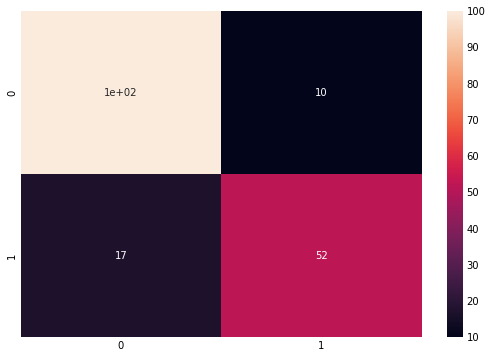

In [126]:
print('\nConfusion matrix:')
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.show()

In [127]:
print('\nClassification report:')
cr = classification_report(Y_test, Y_pred)
print(cr)


Classification report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.84      0.75      0.79        69

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



### Result for dataset test based from XGBoost model have trained

In [129]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,3,0.452723,0.000,0.000000,0.015282,0,1,0,1,0
893,3,0.617566,0.125,0.000000,0.013663,1,0,0,0,1
894,2,0.815377,0.000,0.000000,0.018909,0,1,0,1,0
895,3,0.353818,0.000,0.000000,0.016908,0,1,0,0,1
896,3,0.287881,0.125,0.111111,0.023984,1,0,0,0,1


In [137]:
final_pred = xgb.predict(test)

In [138]:
final_result= test_real_outcome['Survived']

In [139]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(final_result, final_pred ),3))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(final_result, final_pred ))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(final_result, final_pred ))

Accuracy: 0.809
Precision: 0.7608695652173914
Recall: 0.6907894736842105
